In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf 

In [ ]:
# mnist = bdd contenant des caractères écris à la main

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


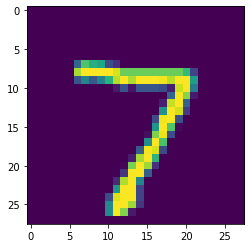

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_test[0])

## Data preparation

<p>Normaliser les données </p>
<p>Faire en sorte que la dimension des données soit compatible avec l'entrée du modèle</p>
<p>Catégorisation de la vérité terrain (y_train, y_test)</p>

In [ ]:
# Normalisation, float32 pour que ce soit compatible avec les méthodes de keras
x_train = x_train.astype("float32") / 255
x_test = x_test.astype('float32') / 255

In [ ]:
# dimension compatible

print(x_train.shape)
print(x_test.shape)

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
# on a plus un nombre, on a une matrice avec un 1 sur la septieme valeur au lieu d'avoir un 7
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## Construction du modèle convolutif

In [ ]:
mnist_model = keras.Sequential(
    [
     # 28 car les images font 28*28 pixels, 1 car c'est en noir et blanc
     keras.Input(shape = (28, 28, 1)),
     layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
     layers.MaxPool2D(pool_size=(2,2)),
     # Destruction de 30% des neuronnes
     layers.Dropout(0.3),
     layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
     layers.MaxPool2D(pool_size=(2,2)),
     # flatten transforme matrice en vecteur
     layers.Flatten(),
     # softmax permet de donner plus d'importance aux probas proches de 1 et de 0
     layers.Dense(10, activation="softmax")
    ]
)
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [ ]:
# lr = learning rate

def scheduler(epoch, lr):
  if epoch == 0:
    return lr 
  else:
    new_lr = lr * tf.math.exp(-0.2)
    return new_lr

## Programmation des callbacks : permet d'adapter notre phase d'apprentissage

In [ ]:
learning_rate_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler) # réduction du learning rate au fur et a mesure
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True) # val_loss = loss (taux d'erreur) de la validation

## Entrainement du modèle

In [ ]:
batch = 16
epochs = 100 # on est pas censé atteindre 100 car il y a l'early stopping

mnist_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history = mnist_model.fit(x_train, y_train, batch_size=batch, callbacks = [learning_rate_scheduler, early_stopping], epochs=epochs, validation_split=0.15)

Epoch 1/100
3188/3188 [==============================] - 30s 6ms/step - loss: 0.1652 - accuracy: 0.9490 - val_loss: 0.0671 - val_accuracy: 0.9813 - lr: 0.0010
Epoch 2/100
3188/3188 [==============================] - 17s 5ms/step - loss: 0.0568 - accuracy: 0.9819 - val_loss: 0.0483 - val_accuracy: 0.9863 - lr: 8.1873e-04
Epoch 3/100
3188/3188 [==============================] - 17s 5ms/step - loss: 0.0404 - accuracy: 0.9875 - val_loss: 0.0403 - val_accuracy: 0.9894 - lr: 6.7032e-04
Epoch 4/100
3188/3188 [==============================] - 17s 5ms/step - loss: 0.0319 - accuracy: 0.9899 - val_loss: 0.0369 - val_accuracy: 0.9897 - lr: 5.4881e-04
Epoch 5/100
3188/3188 [==============================] - 19s 6ms/step - loss: 0.0259 - accuracy: 0.9915 - val_loss: 0.0351 - val_accuracy: 0.9903 - lr: 4.4933e-04
Epoch 6/100
3188/3188 [==============================] - 18s 6ms/step - loss: 0.0201 - accuracy: 0.9937 - val_loss: 0.0337 - val_accuracy: 0.9911 - lr: 3.6788e-04
Epoch 7/100
3188/3188 [===

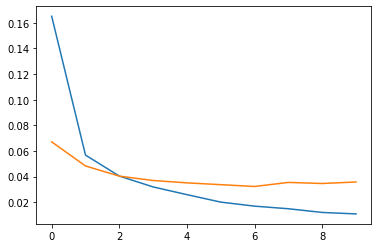

In [ ]:
plt.plot(history.history["loss"], label="Training loss")
plt.plot(history.history["val_loss"], label="Validation loss")
plt.show()

In [ ]:
score = mnist_model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss : {score[0]}")
print(f"Test accuracy : {score[1]}")

Test loss : 0.027575179934501648
Test accuracy : 0.9905999898910522


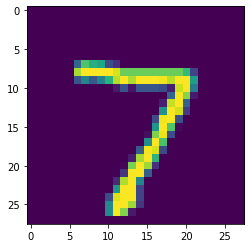

In [ ]:
(_, _), (x_test1, y_test1) = keras.datasets.mnist.load_data()
plt.imshow(x_test1[0])
plt.show()

In [ ]:
prediction = mnist_model.predict(x_test[np.newaxis, 1])
print(prediction)
print(y_test[1])

[[2.4767735e-09 4.4854970e-10 9.9999988e-01 2.4624761e-14 2.1944959e-17
  1.3922251e-20 6.8322329e-08 2.1623403e-14 2.6770747e-10 3.3404673e-17]]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
history2 = mnist_model.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_split=0.15)

# Sans le scheduler et l'early stopping on remarque qu'il y a un overfitting avec la val loss qui augmente et la train loss qui diminue

Epoch 1/100
3188/3188 [==============================] - 17s 5ms/step - loss: 0.0130 - accuracy: 0.9959 - val_loss: 0.0351 - val_accuracy: 0.9909
Epoch 2/100
3188/3188 [==============================] - 17s 5ms/step - loss: 0.0121 - accuracy: 0.9961 - val_loss: 0.0361 - val_accuracy: 0.9916
Epoch 3/100
3188/3188 [==============================] - 18s 6ms/step - loss: 0.0110 - accuracy: 0.9967 - val_loss: 0.0364 - val_accuracy: 0.9910
Epoch 4/100
3188/3188 [==============================] - 18s 6ms/step - loss: 0.0110 - accuracy: 0.9966 - val_loss: 0.0352 - val_accuracy: 0.9912
Epoch 5/100
3188/3188 [==============================] - 19s 6ms/step - loss: 0.0094 - accuracy: 0.9971 - val_loss: 0.0362 - val_accuracy: 0.9914
Epoch 6/100
3188/3188 [==============================] - 17s 5ms/step - loss: 0.0089 - accuracy: 0.9971 - val_loss: 0.0387 - val_accuracy: 0.9904
Epoch 7/100
3188/3188 [==============================] - 18s 6ms/step - loss: 0.0092 - accuracy: 0.9971 - val_loss: 0.0374 -

KeyboardInterrupt: ignored

In [ ]:
# on rajoute un layer mais on les met tous a 32 bits

mnist_model2 = keras.Sequential(
    [
     # 28 car les images font 28*28 pixels, 1 car c'est en noir et blanc
     keras.Input(shape = (28, 28, 1)),
     layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
     layers.MaxPool2D(pool_size=(2,2)),

     # Destruction de 30% des neuronnes
     layers.Dropout(0.3),
     layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
     layers.MaxPool2D(pool_size=(2,2)),

     layers.Dropout(0.3),
     layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
     layers.MaxPool2D(pool_size=(2,2)),

     # flatten transforme matrice en vecteur
     layers.Flatten(),
     # softmax permet de donner plus d'importance aux probas proches de 1 et de 0
     layers.Dense(10, activation="softmax")
    ]
)

In [ ]:
mnist_model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# On remarque que ce modèle est moins performant que le premier

history = mnist_model2.fit(x_train, y_train, batch_size=batch, callbacks = [learning_rate_scheduler, early_stopping], epochs=epochs, validation_split=0.15)

Epoch 1/100
3188/3188 [==============================] - 20s 6ms/step - loss: 0.3464 - accuracy: 0.8890 - val_loss: 0.1086 - val_accuracy: 0.9681 - lr: 0.0010
Epoch 2/100
3188/3188 [==============================] - 19s 6ms/step - loss: 0.1442 - accuracy: 0.9552 - val_loss: 0.0766 - val_accuracy: 0.9782 - lr: 8.1873e-04
Epoch 3/100
3188/3188 [==============================] - 19s 6ms/step - loss: 0.1163 - accuracy: 0.9632 - val_loss: 0.0645 - val_accuracy: 0.9820 - lr: 6.7032e-04
Epoch 4/100
3188/3188 [==============================] - 20s 6ms/step - loss: 0.0996 - accuracy: 0.9695 - val_loss: 0.0600 - val_accuracy: 0.9839 - lr: 5.4881e-04
Epoch 5/100
3188/3188 [==============================] - 20s 6ms/step - loss: 0.0892 - accuracy: 0.9722 - val_loss: 0.0575 - val_accuracy: 0.9836 - lr: 4.4933e-04
Epoch 6/100
3188/3188 [==============================] - 23s 7ms/step - loss: 0.0810 - accuracy: 0.9744 - val_loss: 0.0536 - val_accuracy: 0.9849 - lr: 3.6788e-04
Epoch 7/100
3188/3188 [===

In [ ]:
mnist_model3 = keras.Sequential(
    [
     keras.Input(shape=(28,28,1)),
     layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
     layers.MaxPool2D(pool_size=(2,2)),

     layers.Dropout(0.3),
     layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
     layers.MaxPool2D(pool_size=(2,2)),

     layers.Flatten(),
     layers.Dense(10, activation="softmax"),
    ]
)

In [ ]:
mnist_model3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
history = mnist_model3.fit(x_train, y_train, batch_size=batch, callbacks = [learning_rate_scheduler, early_stopping], epochs=epochs, validation_split=0.15)

Epoch 1/100
3188/3188 [==============================] - 20s 6ms/step - loss: 0.1513 - accuracy: 0.9519 - val_loss: 0.0550 - val_accuracy: 0.9844 - lr: 0.0010
Epoch 2/100
3188/3188 [==============================] - 19s 6ms/step - loss: 0.0526 - accuracy: 0.9829 - val_loss: 0.0476 - val_accuracy: 0.9866 - lr: 8.1873e-04
Epoch 3/100
3188/3188 [==============================] - 19s 6ms/step - loss: 0.0382 - accuracy: 0.9878 - val_loss: 0.0373 - val_accuracy: 0.9896 - lr: 6.7032e-04
Epoch 4/100
3188/3188 [==============================] - 19s 6ms/step - loss: 0.0273 - accuracy: 0.9913 - val_loss: 0.0361 - val_accuracy: 0.9899 - lr: 5.4881e-04
Epoch 5/100
3188/3188 [==============================] - 20s 6ms/step - loss: 0.0213 - accuracy: 0.9935 - val_loss: 0.0335 - val_accuracy: 0.9909 - lr: 4.4933e-04
Epoch 6/100
3188/3188 [==============================] - 20s 6ms/step - loss: 0.0164 - accuracy: 0.9947 - val_loss: 0.0381 - val_accuracy: 0.9902 - lr: 3.6788e-04
Epoch 7/100
3188/3188 [===